<a href="https://colab.research.google.com/github/Ashu10051998/Mobile-price-Range/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile price prediction Notebook

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn as skl
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [13]:
df=pd.read_csv('/content/drive/MyDrive/Data/data_mobile_price_range.csv')

In [5]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#we have no null values.

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#We have price range as dependent variable and rest  other columns as independent variable

In [10]:
df['screen_area']=df['sc_h']*df['sc_w']   # combining screen width and screen height to get screen area.

In [11]:
df.shape

(2000, 22)

In [12]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,16
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,17
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,104
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,48
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,17
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,190


Text(0.5, 0, 'price Range')

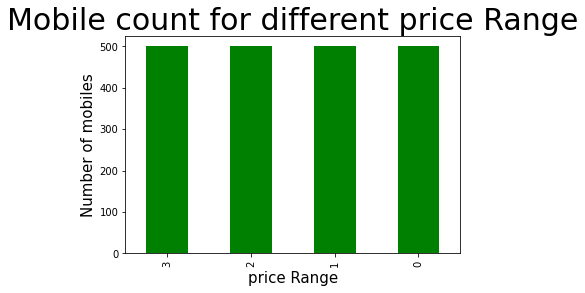

In [64]:
df['price_range'].value_counts().plot(kind='bar',color='green')
plt.title('Mobile count for different price Range',size=30)
plt.ylabel('Number of mobiles',size=15)
plt.xlabel('price Range',size=15)

So we have balanced dataset (in price _range)

In [13]:
df['screen_area'].value_counts()

0      180
24      44
30      39
10      37
18      34
      ... 
64       4
210      4
26       3
133      2
95       2
Name: screen_area, Length: 127, dtype: int64

In [14]:
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [15]:
df1= df[(df['battery_power']>1000) &(df['ram']>3500)]

In [17]:
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area
11,1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3,126
30,1579,1,0.5,1,0,0,5,0.2,88,7,9,1358,1739,3532,17,11,12,0,0,1,3,187
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3,0
46,1723,1,1.1,1,1,0,42,1.0,164,8,14,202,1791,3587,10,5,3,1,0,0,3,50
67,1866,0,1.4,0,0,0,30,0.5,182,3,0,108,1781,3834,16,11,8,0,0,0,3,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1075,0,0.5,1,2,0,11,0.2,122,1,16,271,1769,3927,8,3,7,1,0,0,3,24
1936,1035,1,2.7,0,1,0,40,0.2,157,5,15,757,1912,3548,14,4,5,0,1,1,3,56
1941,1522,0,2.2,0,4,0,21,0.7,162,6,11,533,1696,3767,15,9,16,0,0,1,3,135
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3,152


In [18]:
df1['price_range'].value_counts()

3    179
Name: price_range, dtype: int64

So we got to know that all the phones having 3500 ram and batttery greater than 1000 fall in high price range

In [19]:
df2=df[df['touch_screen']==1]

In [20]:
df2['price_range'].value_counts()

0    262
1    261
3    248
2    235
Name: price_range, dtype: int64

So we have toucch_screen phone in all price range

Text(0.5, 1.0, '% of n_cores Mobile')

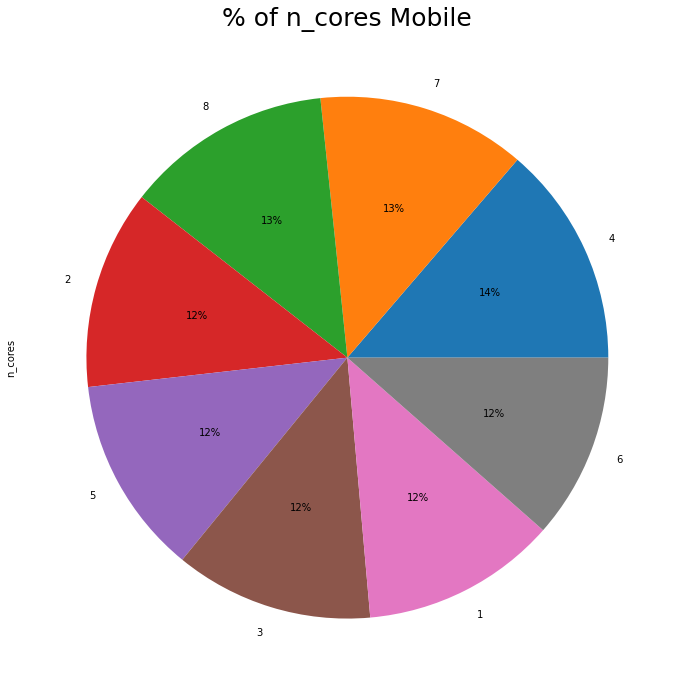

In [21]:
n_cores=df['n_cores'].value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(12,12))
plt.title('% of n_cores Mobile',size=25,color='black')

Quadcore processor have highest cover but by a little margin.

Text(0.5, 0, 'Price Range')

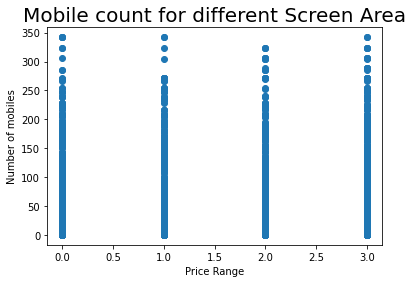

In [63]:
plt.scatter(df['price_range'],df['screen_area'])
plt.title('Mobile count for different Screen Area',size=20)
plt.ylabel('Number of mobiles',size=10)
plt.xlabel('Price Range',size=10)

So we donot get any particular relation between screen area and price of a mobile.

In [23]:
df3= df[(df['dual_sim']==1) &(df['four_g']==1)]

In [62]:
df3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,22
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,190
17,595,0,0.9,1,7,1,23,0.1,121,3,17,441,810,3752,10,2,18,1,1,0,3,20
23,1602,1,2.8,1,4,1,38,0.7,114,3,20,466,788,1037,8,7,20,1,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,930,1,1.0,1,4,1,4,0.9,144,8,10,1017,1289,2016,13,10,16,1,1,1,1,130
1986,1139,1,0.9,1,6,1,58,0.5,161,2,11,742,999,1850,9,4,8,1,0,0,1,36
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,52
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,9


{'boxes': [<matplotlib.patches.PathPatch at 0x7f51e873bf50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51e872db10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51e863e990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f51e863e110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51e869df90>,
  <matplotlib.lines.Line2D at 0x7f51e872d450>]}

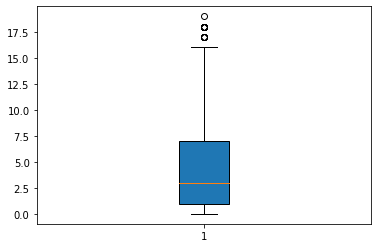

In [24]:
plt.boxplot(df['fc'],patch_artist=True)

So we have most of our mobile phone front camera below 5 megapixel and have outliars in front camera .

In [75]:
df4=df[df['fc']>=17]

In [76]:
df4['price_range'].value_counts()

3    6
1    5
0    4
2    3
Name: price_range, dtype: int64

So even the outliars in the front camera pixel section have not much difference in count of price_range

#we have price range as our dependent variable and rest other features as independent variable

Text(0.5, 0, 'clock frequency(in MHz)')

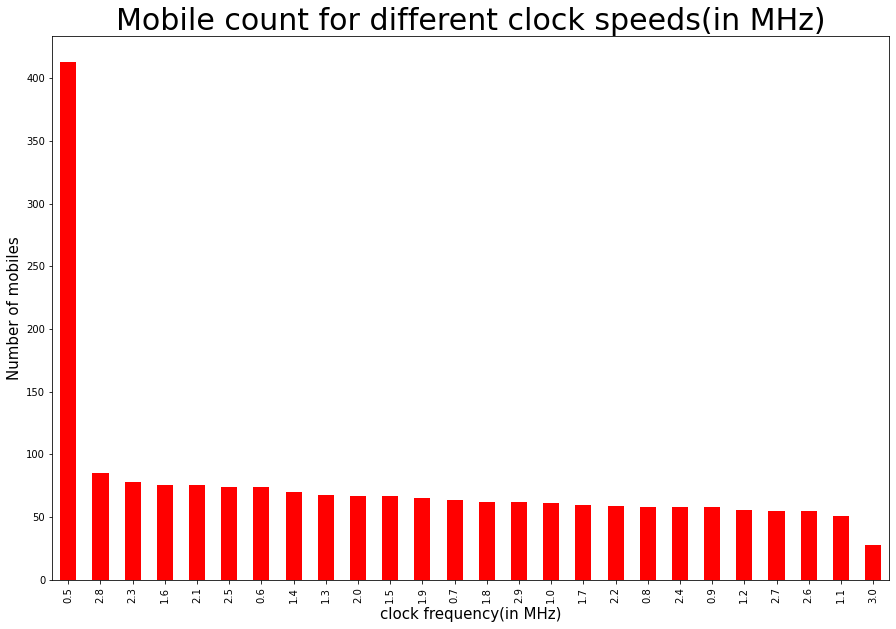

In [60]:
df['clock_speed'].value_counts().plot(kind='bar',figsize=(15,10),color='r')
plt.title('Mobile count for different clock speeds(in MHz)',size=30)
plt.ylabel('Number of mobiles',size=15)
plt.xlabel('clock frequency(in MHz)',size=15)

In [74]:
df=df.drop(df['screen_area'])

KeyError: ignored

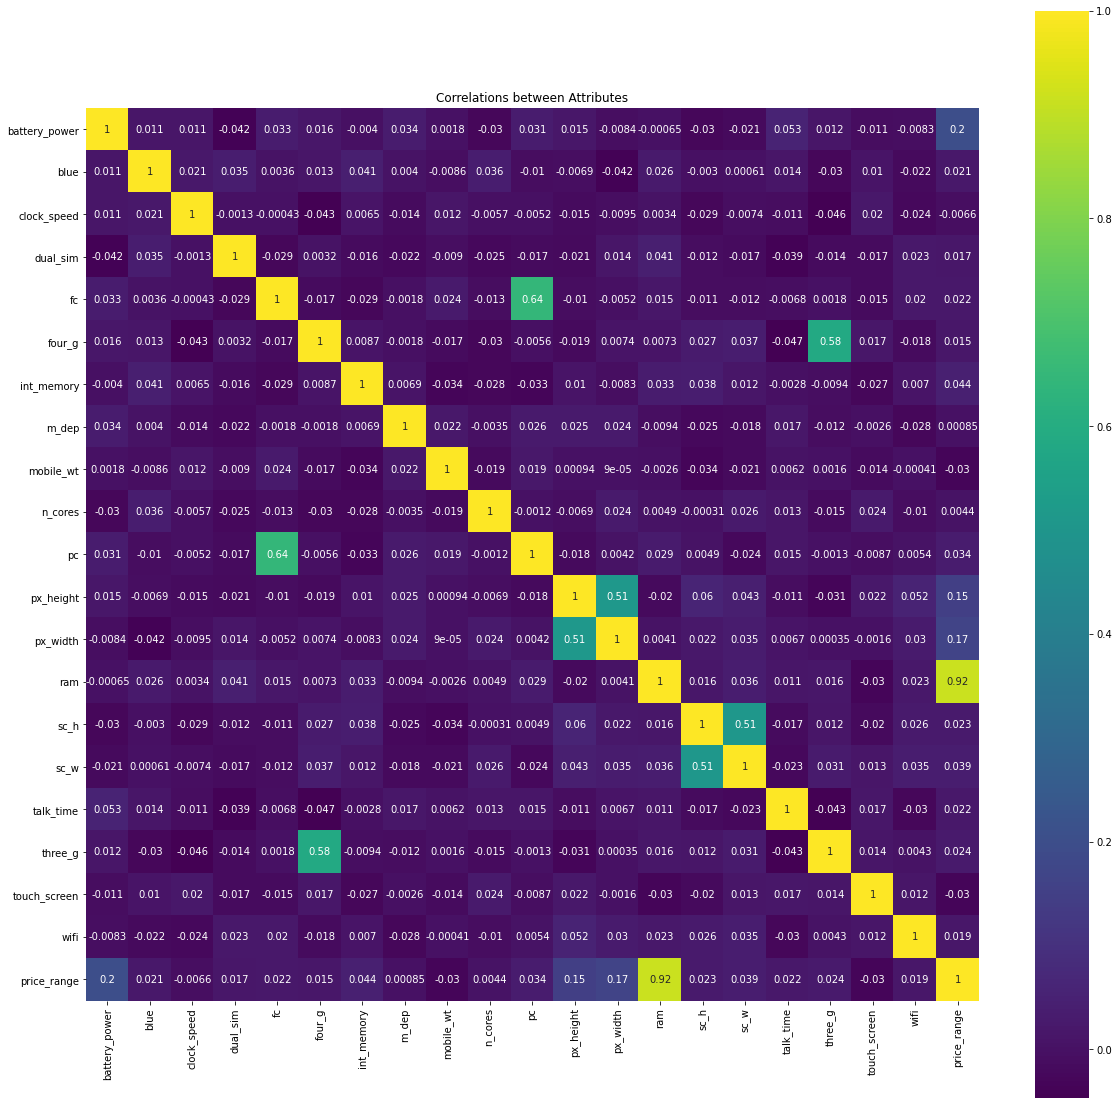

In [14]:
fig = plt.subplots (figsize = (20, 20))
sns.heatmap(df.corr (), square = True, cbar = True, annot = True, cmap="viridis", annot_kws = {'size': 10})
plt.title('Correlations between Attributes')
plt.show ()

#We see from the heatmap;

The most influential variable is ram.

Most of the variables have very little correlation to price range.

Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect price range.

Having 3G and 4G is somewhat correlated

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

#Implementation of ML Algorithms

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.


  Logistic regression

  Decision tree

  Random forest

  KNN

  Gradient Boosting

In [15]:
#Doing the train test split
y = df['price_range']
x = df.drop('price_range', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)


Implementing Logistic Regression

In [16]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_lr = lr.predict(x_test)

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[88, 11,  1,  0],
       [ 8, 64, 25,  3],
       [ 0, 13, 58, 29],
       [ 0,  1, 17, 82]])

In [19]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.73

#Decision Tree



In [20]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [21]:
y_pred_dt = dt.predict(x_test)

In [22]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [23]:
#After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_dt))

[[89 11  0  0]
 [ 7 74 19  0]
 [ 1  9 80 10]
 [ 0  0 12 88]]


In [24]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.79      0.74      0.76       100
           2       0.72      0.80      0.76       100
           3       0.90      0.88      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



Precision and recall metrices should be high as possible. They gives us accuracy level out of different classes.

We use f1-score to compare models that have different precision and recall levels.

In [25]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt

0.8275

#Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy') 
model_rf = rf.fit(x_train, y_train)

In [27]:
y_pred_rf = rf.predict(x_test)

In [94]:
print(metrics.confusion_matrix(y_test, y_pred_rf))

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [28]:
# Create confusion matrix
pd.crosstab(y_test, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [29]:
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
acc_rf

0.9025

We see that accuracy score in random forest model is higher than decision tree accuracy score.

#K-Nearest Neighbors (KNN)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [33]:
y_pred_knn = model_knn.predict(x_test)

In [34]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [35]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9475

#Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
#Gradient Boosting Classifier classifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


In [40]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print(metrics.confusion_matrix(y_test, y_test_pred))

Train Set Accuracy:99.9375
Test Set Accuracy:92.25
[[95  5  0  0]
 [ 3 94  3  0]
 [ 0  3 88  9]
 [ 0  0  8 92]]
